In [ ]:
## @see https://www.kaggle.com/toorkp/churn-wsdm/data

In [1]:
%load_ext autoreload
%autoreload

In [2]:
import numpy as np
import pandas as pd
import time
import gc; gc.enable()
import time
import sys

from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score, log_loss, confusion_matrix
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from collections import Counter
from numpy.random import RandomState
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('modules')

from shared_functions import *

In [3]:
import sklearn
import xgboost
import imblearn
import tpot
import autosklearn

print("NumPy Version:\t\t\t", np.__version__)
print("Pandas Version:\t\t\t", pd.__version__)
print("Scikit-learn Version:\t\t", sklearn.__version__)
print("XGBoost:\t\t\t", xgboost.__version__)
print("Imbalanced-learn:\t\t", imblearn.__version__)
print("TPOT:\t\t\t\t", tpot.__version__)
print("autosklearn:\t\t\t", autosklearn.__version__)

NumPy Version:			 1.16.4
Pandas Version:			 0.24.2
Scikit-learn Version:		 0.21.2
XGBoost:			 0.90
Imbalanced-learn:		 0.5.0
TPOT:				 0.10.2
autosklearn:			 0.5.2


In [4]:
# Load the pre-split data

store = pd.HDFStore('/home/dissertation/data/base_abt_split.h5')
X_train = store['X_train']
X_test = store['X_test']
y_train = store['y_train']
y_test = store['y_test']
store.close()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(600803, 16) (600803,)
(257487, 16) (257487,)


,msno,city,bd,registered_via,registration_init_time,registration_init_time_dt,total_order,payment_method_id_mode,payment_method_id_count,payment_plan_days_mode,payment_plan_days_mean,plan_list_price_mean,plan_lifetime_value,is_auto_renew_mode,transaction_date_max,cancel_times
703741,k5508nHWp+WmOeQTuChB4ETVmbhFmA+7E0qgK1uXKEg=,4,32,3,20130407,2013-04-07,22,33,1,30,21.82,108.36,2384.00,True,20170228,0
228194,WiRqDxpeBqgkDSqd3kRG/VgZbbDUh7yjxHquuY+iVbY=,13,33,3,20131125,2013-11-25,19,39,1,30,28.58,141.16,2682.00,True,20170131,0
735733,YVVOQPk0x2NeB3WqLgc9Sp1R8rIbaWDAnXAZFOf7rlY=,15,22,3,20150705,2015-07-05,17,40,3,30,30.00,158.12,2688.00,True,20170210,4
774256,pm07iNhaXPZ3On4cr4xyL4qOETYWikeemBOHZKhvzYI=,1,0,7,20140806,2014-08-06,26,41,1,30,28.85,143.27,3725.00,True,20170205,0
282188,MboyMUzNIj6LN+wDrZai6uLE3XQ0ReA79JSMNZfkLgk=,1,0,7,20121026,2012-10-26,27,41,1,30,28.89,132.00,3564.00,True,20170216,1


In [5]:
## Create a list of the categorical columns in the dataset
cat_col = ['city', 'registered_via', 'payment_method_id_mode']

# Drop msno from the dataset
X_train.drop(['msno'], inplace=True, axis=1)
X_test.drop(['msno'], inplace=True, axis=1)

In [6]:
RANDOM_STATE = 42 
CV_ITER = None
SCORING_METRIC = None


## Each entry in the list is a Tuple of
##   [ModelName, Model, HyperParams, ScoringMetric]
classifiers = [
    ('NB', GaussianNB(), {}, SCORING_METRIC),
    ('DT', DecisionTreeClassifier(), {}, SCORING_METRIC),
    ('RF', RandomForestClassifier(n_jobs =-1), {}, SCORING_METRIC),
    ('LR', LogisticRegression(solver = 'liblinear'), {}, SCORING_METRIC),
    ('AB', AdaBoostClassifier(), {}, SCORING_METRIC),
    ('MLP', MLPClassifier(), {}, SCORING_METRIC),
    ('XGB', xgb.XGBClassifier(objective="binary:logistic", random_state=42), {}, SCORING_METRIC) 
]

In [7]:
all_metrics = pd.DataFrame()
all_metrics

""


### Experiment 1.1 Baseline - Default Settings - No sampling

Model Build Iteration 0
PRE-SAMPLING: (600803, 15) (600803,) Counter({0: 544661, 1: 56142})
POST-SAMPLING: (600803, 15) (600803,) Counter({0: 544661, 1: 56142})
Set the train df types correctly based on the test set
Applying normalisation to train and test sets
Categorical columns in dataset ['city', 'registered_via', 'payment_method_id_mode']
Categorical columns in dataset ['city', 'registered_via', 'payment_method_id_mode']
X_train:  (600803, 70) (600803, 1)
X_test:  (257487, 70) (257487, 1)


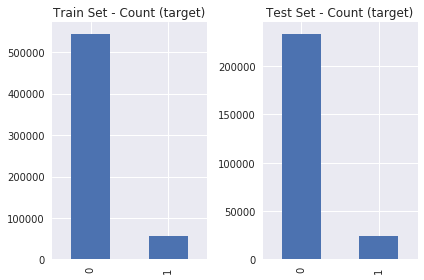

Building NB classifier
No params set, using Standard training
Building DT classifier
No params set, using Standard training
Building RF classifier
No params set, using Standard training


/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Building LR classifier
No params set, using Standard training


/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Building AB classifier
No params set, using Standard training
Building MLP classifier
No params set, using Standard training


/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Building XGB classifier
No params set, using Standard training


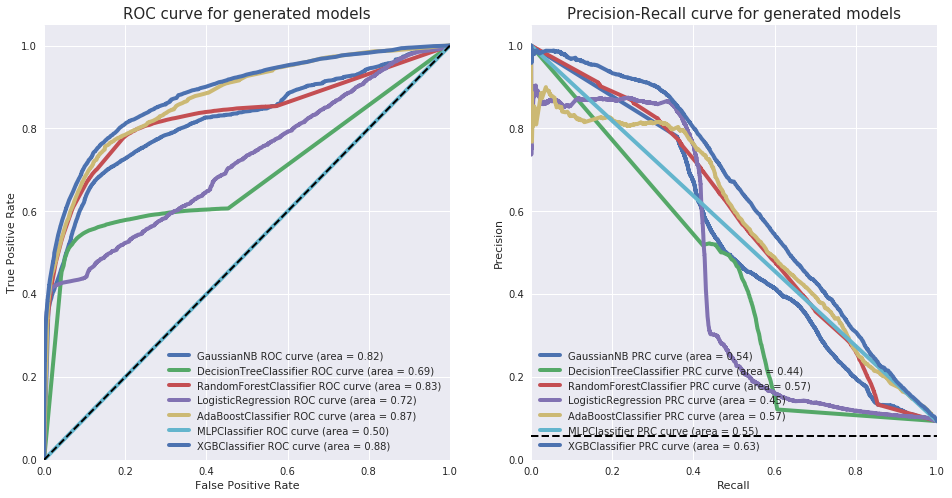

CPU times: user 29min 11s, sys: 1min 16s, total: 30min 27s
Wall time: 10min 4s


In [8]:
%%time

sampler = ('None', DummySampler())

exp_metrics = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, \
                                 RANDOM_STATE, cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.2 Baseline - Default Settings - Oversampled training set 100%

In [ ]:
%%time

sampler = ('ROS 1:1', RandomOverSampler(random_state=RANDOM_STATE))

exp_metrics = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, 
                                 RANDOM_STATE, cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.3 Baseline - Default Settings - Undersampled training set

In [ ]:
%%time

sampler = ('RUS 1:1', RandomUnderSampler(random_state=RANDOM_STATE))

exp_metrics = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, 
                                 RANDOM_STATE, cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.4 Baseline - Default Settings - Over sampling - 33% of majority size

In [ ]:
%%time

sampler = ('ROS 3:1', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 1/3))

exp_metrics = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, 
                                 RANDOM_STATE, cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.5 Baseline - Default Settings - Over sampling - 66% of majority size

In [ ]:
%%time

sampler = ('ROS 3:2', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 2/3))

exp_metrics = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, 
                                 RANDOM_STATE, cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)

## Experiment 1.6 Baseline - Default Settings - Over sampling - 50% of majority size

In [ ]:
%%time

sampler = ('ROS 2:1', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 1/2))

exp_metrics = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, 
                                 RANDOM_STATE, cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)

### Experiment 1.7 Baseline Default Settings SMOTE-NC

In [ ]:
%%time

sampler = ('SMOTE_NC', SMOTENC(random_state=RANDOM_STATE, categorical_features=[0,1,2,3,4,5,6,7,12,13], n_jobs=8))

## Keep the following, essentially dropping the dt columns
cols = ['is_churn', 'city', 'bd', 'registered_via', 'total_order',
       'payment_method_id_mode', 'payment_method_id_count',
       'payment_plan_days_mode', 'payment_plan_days_mean',
       'plan_list_price_mean', 'plan_lifetime_value', 'actual_amount_mean',
       'total_actual_amount', 'is_auto_renew_mode', 'cancel_times']

exp_metrics = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, 
                                 RANDOM_STATE, cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)

In [ ]:
all_metrics.sort_values(['recall'], ascending=[False]).groupby('classifier').head(1)

In [ ]:
all_metrics.sort_values(['auprc', 'recall'], ascending=[False, False]).head(15)

In [ ]:
all_metrics.groupby(['classifier','sampling_method']).agg({})

In [ ]:
## Just try an SVM 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [ ]:
%%time
model_train_results = train_model(base_dataset, sampling_method = 'under', classifiers = [('SGDClassifier', SGDClassifier(loss='log'))])

In [ ]:
## Print the feature importance 

feature_index = np.flip(np.argsort(model.feature_importances_), axis=0)
ordered_features = []
column_names = X_test.columns

for i in feature_index[0:10]:
    print(np.round(model.feature_importances_[i], 3), ' --> ', column_names[i])
    ordered_features.append(column_names[i])

In [ ]:
## Print the permutation importance 

import eli5
from eli5.sklearn import PermutationImportance

_, X_test, _, y_test = prepare_train_test_split(model_dataset, 0)

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
#model_name, model = model_train_results[1][2]

for model_name, model in model_train_results[1]:
    probs = model.predict_proba(X_test)[:, 1]
    pr_data = plot_precision_recall(
        y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
pr_data = plot_roc(
    y_test, probs, title='ROC Curve for {0}'.format(model_name))

In [ ]:
print(plt.style.available)

In [ ]:
model_dataset.head()

In [ ]:
print("Original Data distribution")
print(model_dataset['is_churn'].value_counts())

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Down Sampled data set')
train_downsample = undersampled_dataset(model_dataset, 'is_churn')

print(train_downsample['is_churn'].value_counts())
print("Num records = ", train_downsample.shape[0])
train_downsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Up Sampled data set')
train_upsample = oversampled_dataset(model_dataset, 'is_churn')

print(train_upsample['is_churn'].value_counts())
print("Num records = ", train_upsample.shape[0])
train_upsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='Precision-Recall Curve for Random Forest')

In [ ]:
precision_above = pr_data.loc[pr_data['precision'] >= 0.25].copy()
precision_above.sort_values('recall', ascending=False, inplace=True)
precision_above.head()

In [ ]:
threshold_required = 0.5
# Make predictions where probability is above threshold
preds = np.zeros(len(y_test))
preds[probs >= threshold_required] = 1

# Make and plot confusion matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],
                      title='Churn Confusion Matrix')

In [ ]:
model_dataset.head()

In [ ]:
fi = pd.DataFrame({'importance': model.feature_importances_}, index=model_dataset.iloc[:, 1:].columns).\
    sort_values('importance', ascending=False)
fi.head(10)